In [24]:
import matplotlib.pyplot as plt
from math import sqrt
from matplotlib import pyplot
import pandas as pd
import numpy as np
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from statsmodels.graphics.tsaplots import plot_acf
from keras import layers
from keras.optimizers import Adam
import keras
import yfinance as yf

import math
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [25]:
df =yf.download('TSLA', start='2015-01-01', end='2023-01-01')
df.index.name = 'date'
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
date,,,,,,
2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000
2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500
2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500
2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000
2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500


In [26]:
y=df['Close']
len(df)

2014

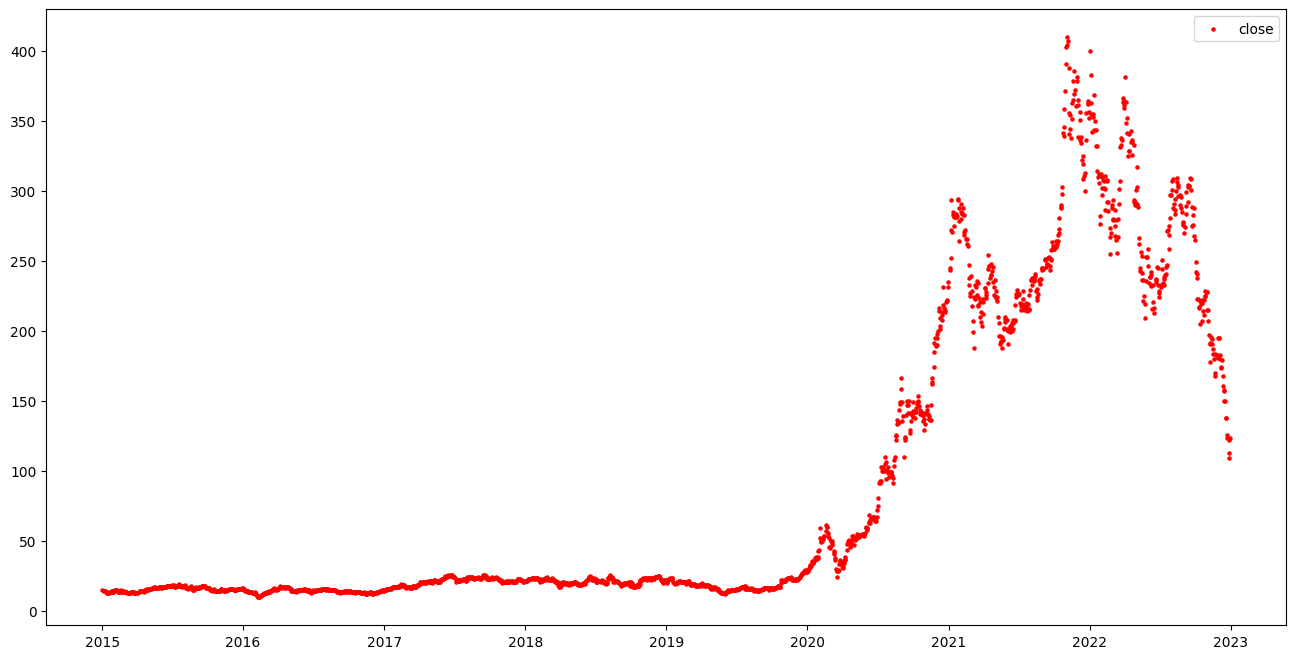

In [27]:
plt.rcParams['figure.figsize'] = (16,8)
x=y.index


plt.scatter(x,  
            y,  
            s=5,
            c='red', 
            label='close'
)  

plt.legend() 

plt.show()  

In [28]:
# 循环神经网络方法训练
look_back=60
Tp = 1200
values = y.values
#归一化
mm = MinMaxScaler()
values=np.reshape(values,(values.shape[0],1))
values=mm.fit_transform(values)
train, test = values[0:Tp], values[Tp:1945]

In [29]:
def convertToMatrix(data, step,ystep):
        X=[]
        Y=[]
        for i in range((len(data)-step)//12-1):
            d = 12*i+step
            X.append(data[12*i:d,])
            Y.append(data[d:d+ystep,])
        return np.array(X), np.array(Y)

In [30]:
trainX, trainY = convertToMatrix(train, look_back,12)
testX, testY = convertToMatrix(test, look_back,12)
trainX.shape, trainY.shape, testX.shape, testY.shape

((94, 60, 1), (94, 12, 1), (56, 60, 1), (56, 12, 1))

In [31]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainY= np.reshape(trainY, (trainY.shape[0],  trainY.shape[1]))
testY= np.reshape(testY, (testY.shape[0],  testY.shape[1]))

In [32]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(units=32, return_sequences=True, input_shape=( 1,look_back)),
    keras.layers.SimpleRNN(32),
    keras.layers.Dense(12)
])
model.summary()

d:\app\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 32)          │         2,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,452 (21.30 KB)

 Trainable params: 5,452 (21.30 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss="mse", optimizer="adam")
history = model.fit(trainX, trainY, epochs=60,
                    validation_data=(testX, testY))

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 5.4476e-04 - val_loss: 0.1708
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5186e-04 - val_loss: 0.1191
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3861e-04 - val_loss: 0.1116
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1450e-04 - val_loss: 0.1162
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0339e-04 - val_loss: 0.1162
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.6675e-05 - val_loss: 0.1150
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 7.1203e-05 - val_loss: 0.1129
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.1911e-05 - val_loss: 0.1079
Epoch 9/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.2605e-05 - val_loss: 0.0997
Epoch 10/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8800e-05 - val_loss: 0.0943
Epoch 11/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.8909e-05 - val_loss: 0.0905
Epoch 12/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [34]:
#make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
#invert predictions
trainY= np.reshape(trainY, (trainY.shape[0],  trainY.shape[1]))
testY= np.reshape(testY, (testY.shape[0],  testY.shape[1]))
trainPredict = mm.inverse_transform(trainPredict)
trainYb = mm.inverse_transform(trainY)
testPredict = mm.inverse_transform(testPredict)
testYb = mm.inverse_transform(testY)
#calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainYb, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testYb, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Score: 1.67 RMSE
Test Score: 81.40 RMSE


In [35]:
trainPredict=np.reshape(trainPredict,(-1,1))
testPredict=np.reshape(testPredict,(-1,1))

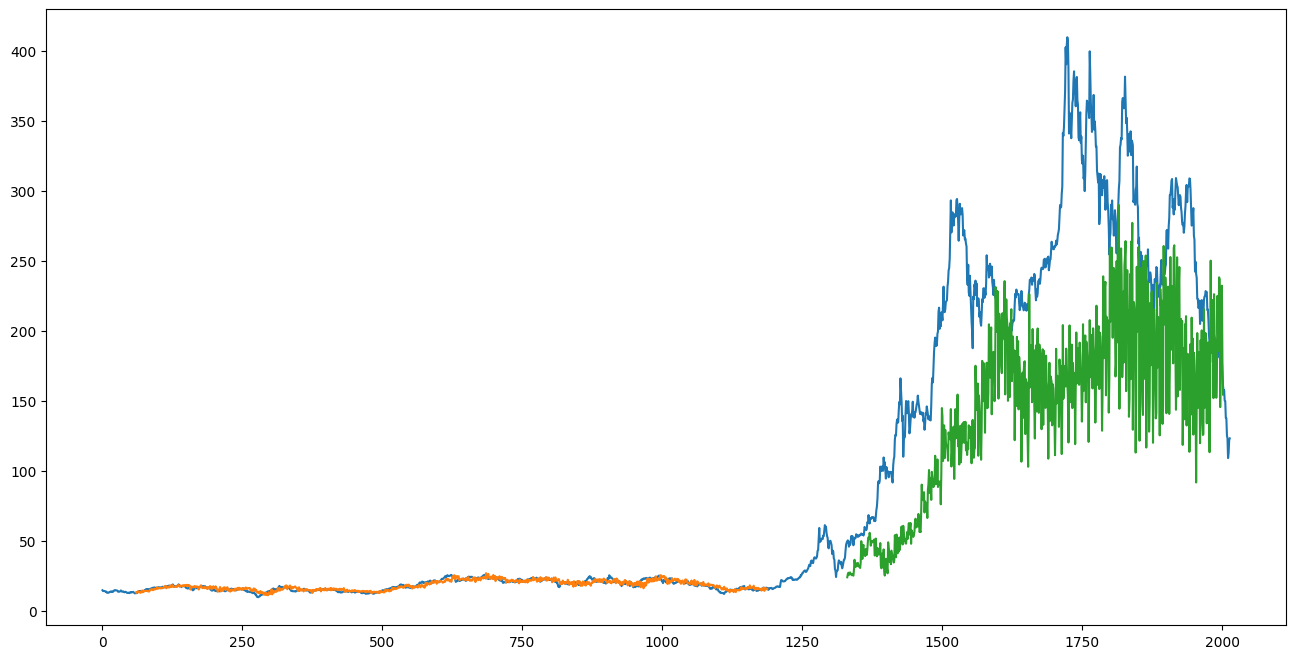

In [36]:
#shift train predictions for plotting
trainPredictPlot = np.empty_like(values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
#shift test predictions for plotting
testPredictPlot = np.empty_like(values)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(values)-len(testPredict)-12:len(values)-12, :] = testPredict
#plot baseline and predictions
plt.plot(mm.inverse_transform(values))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [37]:

def plot_multiple_forecasts(X, Y, Y_pred,time):
    Y_pred = mm.inverse_transform(Y_pred)
    X=np.reshape(X, (X.shape[0], X.shape[2]))
    X = mm.inverse_transform(X)
    Y = mm.inverse_transform(Y)
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plt.plot(time[0: n_steps],X[0,:])
    plt.plot(time[n_steps:n_steps + ahead], Y[ 0,:], "bo-", label="Actual")
    plt.plot(time[n_steps: n_steps + ahead], Y_pred[ 0,:], "rx-", label="Forecast", markersize=10)
   
    plt.legend(fontsize=14)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


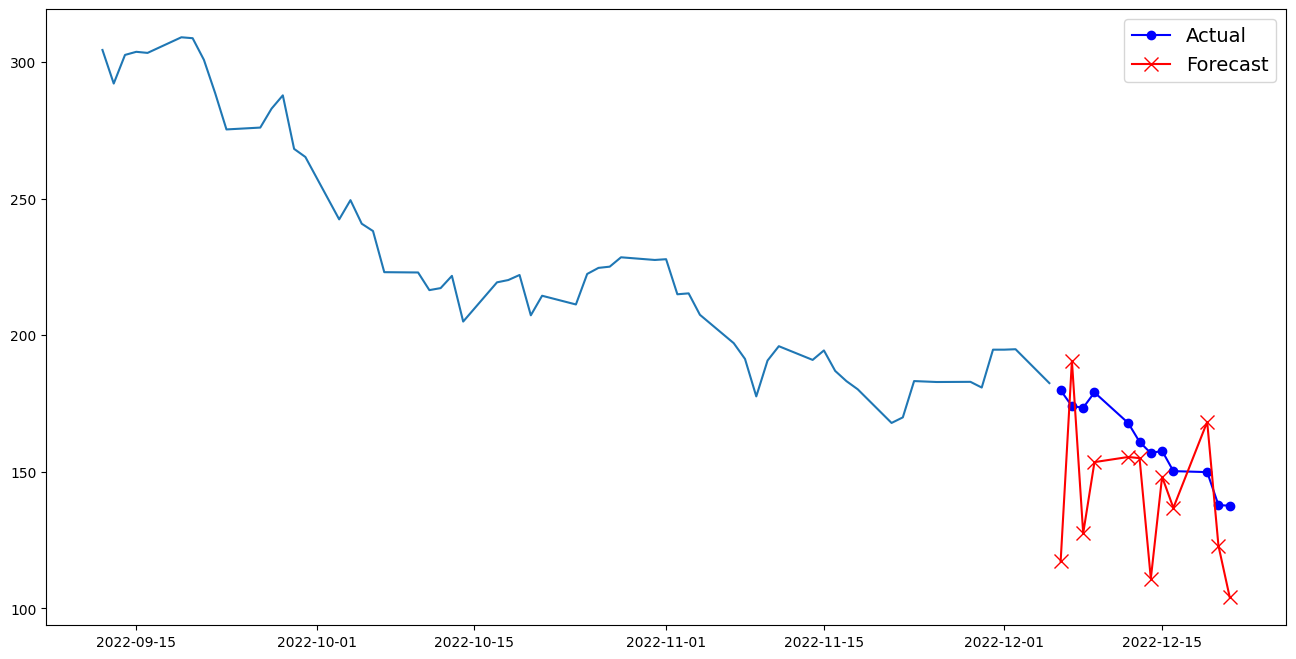

In [38]:
X_new=values[-78:-18,:]
Y_new=values[-18:-6,:]
X_new = np.reshape(X_new, (1,X_new.shape[1], X_new.shape[0]))
Y_new=np.reshape(Y_new, (1,Y_new.shape[0]))
Y_pred = model.predict(X_new)

time=y[-78:-6].index
plot_multiple_forecasts(X_new, Y_new, Y_pred,time)
plt.show()